# Principle Component Analysis

Die PCA projiziert die Datenmatrix $\mathbf{X}$ aus $n$ Beobachtungen und $p$ Features in einen $l$ dimensionalen Subraum, sodass die größte Varianz der projizierten Daten auf der ersten Koordinate (1. Hauptkomponente) liegt. Die zweitgrößte Varianz liegt dann auf der zweiten Koordinate usw.  
Gesucht sind demzufolge $l$ Vektoren bestehend aus jeweils $p$ Koeffizienten die Daten in den Subraum durch Linearkombination projizieren:  
$\mathbf{w}_k = (w_1, ..., w_p)_k$  

Die Linearkombination der Beobachtung $x_i$ mit der $k$-ten Hauptkomponente hat die Form:  
$t_{ki} = \sum_{j=1}^{p} w_{kj}x_{ij}$

In [137]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline
import math

## Uncorrelated features

In [138]:
x=np.random.normal(0, 10, 100)
y=np.random.normal(0, 1, 100)

(-40, 40)

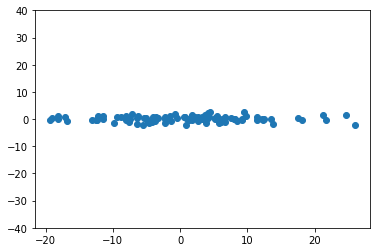

In [139]:
plt.scatter(x,y)
plt.ylim([-40, 40])

In [140]:
df = np.array(list(zip(x,y)))

In [141]:
pca = PCA(n_components=1)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [142]:
pca.components_[0]

array([9.99999990e-01, 1.41000013e-04])

PCA Component for feature x is way bigger

In [143]:
pca.explained_variance_ratio_

array([0.9896484])

In [144]:
def slope_pca(pca):
    return pca.components_[0][1] / pca.components_[0][0]

In [145]:
def abline(x, slope):
    x = np.linspace(min(x), max(x))
    y = slope * x
    return plt.plot(x, y, c='red')

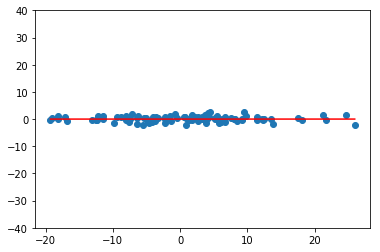

In [146]:
plt.scatter(x,y)
plt.ylim([-40, 40])
abline(x, slope_pca(pca))

Data is mostly projected towards feature x

### Scaling the features (mean-centered scaling)

In [147]:
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

In [148]:
df = np.array(list(zip(x,y)))

In [149]:
pca = PCA(n_components=1)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [150]:
pca.components_[0]

array([0.70710678, 0.70710678])

Principle components are equal for both features x and y

In [151]:
pca.explained_variance_ratio_

array([0.50068212])

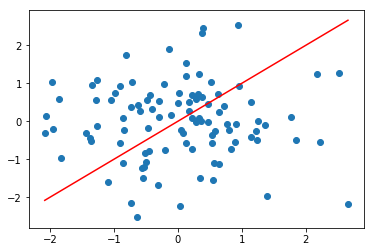

In [152]:
plt.scatter(x,y)
abline(x, slope_pca(pca))

> It is absolutely essential to scale features before performing PCA. Otherwise features with lower variance (based on original scale) with low influence on PCA.

## Correlated Variables

In [153]:
y = x + np.random.normal(0, 1, len(x))

In [154]:
x = (x - x.mean()) / x.std()
y = (y - y.mean()) / y.std()

In [155]:
np.corrcoef(x,y)

array([[1.        , 0.69698682],
       [0.69698682, 1.        ]])

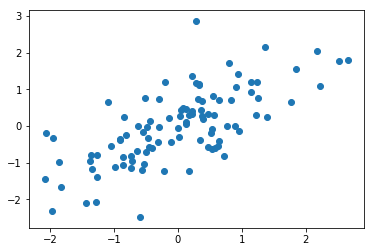

In [156]:
plt.scatter(x, y)

In [157]:
df = np.array(list(zip(x,y)))

In [158]:
pca = PCA(n_components=1)
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=1, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [159]:
pca.components_[0]

array([0.70710678, 0.70710678])

In [160]:
pca.explained_variance_ratio_

array([0.84849341])

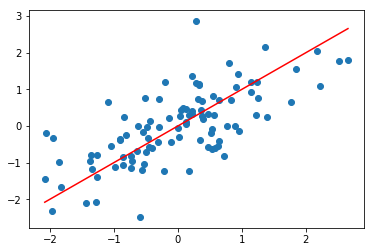

In [161]:
plt.scatter(x,y)
abline(x, slope_pca(pca))